In [1]:
import csv
import cv2
import h5py
import json
import matplotlib.pyplot as plt
import numpy as np
import shutil
import os

In [9]:
def normalize_image(im, auto = True):
    if auto:
        add = 0 - (im.min())
        im = im + add
        im = im /(im.max() / 256)
    else:
        add = 0 - (-1200)
        im = im + add
        im = im /(1500 / 256)
    return im

In [3]:
def normalize_mask(im):
    im[im == 1]=255
    im[im == 2]=255
    im[im == 3]=100
    return im#

In [10]:
source_path = "./Dataset/tmp/Dataset/"
original_save_path = "./original_images/"
mask_save_path = "./mask_images/"

opener = open('metadata.csv', mode='r')
meta = csv.reader(opener, delimiter=',')
for index, row in enumerate(meta):
    print(index, row)
    if index == 0:
        continue
    file_name = row[0]
    
    #if only masked is needed open code below
    #is_masked = row[5]
    is_masked = True
    if is_masked:
        save_file_name = file_name.replace(".h5", ".png")
        data = h5py.File(source_path + file_name, 'r')
        original_image = np.asarray(data['image'], dtype=np.float64)
        #windowing changes in data set
        manuel = len(file_name.split("_")[1]) - 1
        original_image = normalize_image(original_image, manuel)
        cv2.imwrite(original_save_path + save_file_name, original_image)
        mask_image = np.asarray(data['mask_lung_and_infection'], dtype=np.uint8)
        normalized_mask_image = normalize_mask(mask_image)
        cv2.imwrite(mask_save_path + save_file_name, normalized_mask_image)

0 ['filename', 'slice_no', 'volume_no', 'mask_lung', 'mask_infection', 'mask_lung_and_infection']
1 ['volume_0_slice_0.h5', '0', '0', '0', '0', '0']
2 ['volume_0_slice_1.h5', '1', '0', '0', '0', '0']
3 ['volume_0_slice_2.h5', '2', '0', '0', '0', '0']
4 ['volume_0_slice_3.h5', '3', '0', '0', '0', '0']
5 ['volume_0_slice_4.h5', '4', '0', '0', '0', '0']
6 ['volume_0_slice_5.h5', '5', '0', '0', '0', '0']
7 ['volume_0_slice_6.h5', '6', '0', '0', '0', '0']
8 ['volume_0_slice_7.h5', '7', '0', '0', '0', '0']
9 ['volume_0_slice_8.h5', '8', '0', '0', '0', '0']
10 ['volume_0_slice_9.h5', '9', '0', '0', '0', '0']
11 ['volume_0_slice_10.h5', '10', '0', '0', '0', '0']
12 ['volume_0_slice_11.h5', '11', '0', '0', '0', '0']
13 ['volume_0_slice_12.h5', '12', '0', '0', '0', '0']
14 ['volume_0_slice_13.h5', '13', '0', '0', '0', '0']
15 ['volume_0_slice_14.h5', '14', '0', '0', '0', '0']
16 ['volume_0_slice_15.h5', '15', '0', '0', '0', '0']
17 ['volume_0_slice_16.h5', '16', '0', '0', '0', '0']
18 ['volume_0

In [75]:
data = h5py.File('./Dataset/tmp/Dataset/volume_2_slice_155.h5', 'r')
data.keys()

<KeysViewHDF5 ['image', 'mask_infection', 'mask_lung', 'mask_lung_and_infection']>

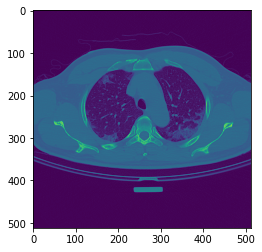

In [104]:
nparray = np.asarray(data['image'], dtype=np.float64)
nparray = normalize_image(nparray)
cv2.imwrite("asdf.png",nparray)
plt.imshow(nparray,)

In [8]:
string = len("volume_19_slice_32.h5".split("_")[1])-1
if string:
    print(string)

1


In [9]:
len(string)

1

In [10]:
if 1:
    print("1")
else:
    print("0")

1
